## Understanding Logistic Regression and Building Model in Python

Let's build diabetes prediction model.

Here, you are going to predict diabetes using Logistic Regression Classifier.

Let's first load the required Pima Indian Diabetes dataset using pandas's read CSV function. You can download data from following link: https://www.kaggle.com/uciml/pima-indians-diabetes-database

#### Loading Data

In [4]:
#import pandas
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("pima-indians-diabetes.csv", header=None, names=col_names)

In [5]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Selecting Feature

Here, you need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [6]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

#### Spliting Data

To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split dataset by using function train_test_split(). you need to pass basically 3 parameters features, target, and test_set size. Additionally, you can use random_state to select records randomly.

In [7]:
# split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

/home/admin/.local/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Here, Dataset is broken into two parts in ratio of 75:25. It means 75% data will used for model training and 25% for model testing.

#### Model Development and Prediction 

First, import the Logistic Regression module and create Logistic Regression classifier object using LogisticRegression() function.

Then, fit your model on train set using fit() and perform prediction on the test set using predict().

In [8]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

### Model Evaluation using Confusion Matrix

A confusion matrix is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental of confusion matrix is the number of correct and incorrect predictions are summed up class-wise.

In [9]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[119,  11],
       [ 26,  36]])

Here, you can see the confusion matrix in form of array object. The dimension of this matrix is 2*2 because this model is binary classification. you have two classes 0 and 1. Diagonal values represents accurate predictions, while non-diagonal elements are inaccurate predictions. In output, 119 and 36 are actual predictions and 26 and 11 are inaccurate predictions.  

#### Visualizing Confusion Matrix using Heatmap

Let's visualize results of model in form of confusion matrix using matplotlib and seaborn. 

Here, you will visualize confusion matrix using Heatmap.

In [10]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5,257.44,'Predicted label')

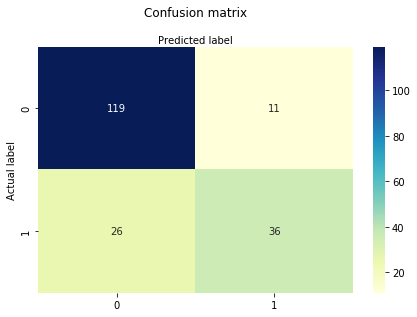

In [11]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### Confusion Matrix Evaluation Metrics

Let's evaluate model using model evaluation metrics such as accuracy, precision, and recall.

In [12]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8072916666666666
Precision: 0.7659574468085106
Recall: 0.5806451612903226


Well, you got a classification rate of 80%, considered as good accuracy.

Precision: Precision is about being precise i.e. How precise your model is. In other words, you can say, when a model makes a prediction, how often it is correct. In your prediction case, when your Logistc Regression model predicted patients are going to suffer from diabetes, that patients actually have 76% time.

Recall: If there are patients who actually have diabetes in the test set and your Logistic Regression model is able to identify it 58% of the time.

#### ROC Curve

Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity. 

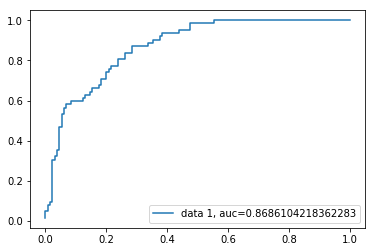

In [13]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

AUC score for the case is 0.86. AUC score 1 reprents perfect classifier and 0.5 represents a worthless classifier.